# Necessary imports

In [215]:
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix, cohen_kappa_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Reading the dataframe

In [216]:
df = pd.read_csv('vehicle-1.csv')

In [217]:
df.head(20)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [219]:
df.shape

(846, 19)

### Analysis
The csv file has 846 entries and 19 attributes. The columns - 
circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 have null values.
All of these are continuous variables.

The given data has only one categorical column i.e. class

We need to fill these null values with some strategy.
Also, we need to reduce the dimensionality of the data, because training the model with this much attributes is sure to cause a curse of dimensionalty.

# Exploratory Data Analysis

In [220]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

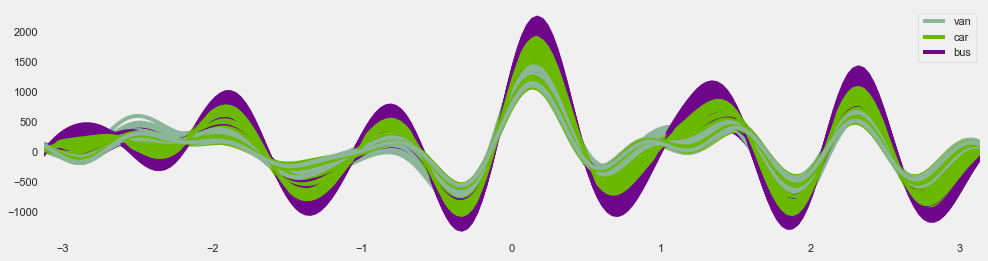

In [221]:
plt.figure(figsize=(15,4))
plotting.andrews_curves(df, 'class')

From Andrew curves we can infer that the class bus is easily distinguishable from the van and car. We can see some sort of overlapping that occurs for van and car.
Andrew curve transforms the higher dimensional data into visualisable form and it potentialy indicates that we can have 12 principle components. Lets compare this analysis with that of the principle component later.

Text(0.5, 0, 'distance_circularity')

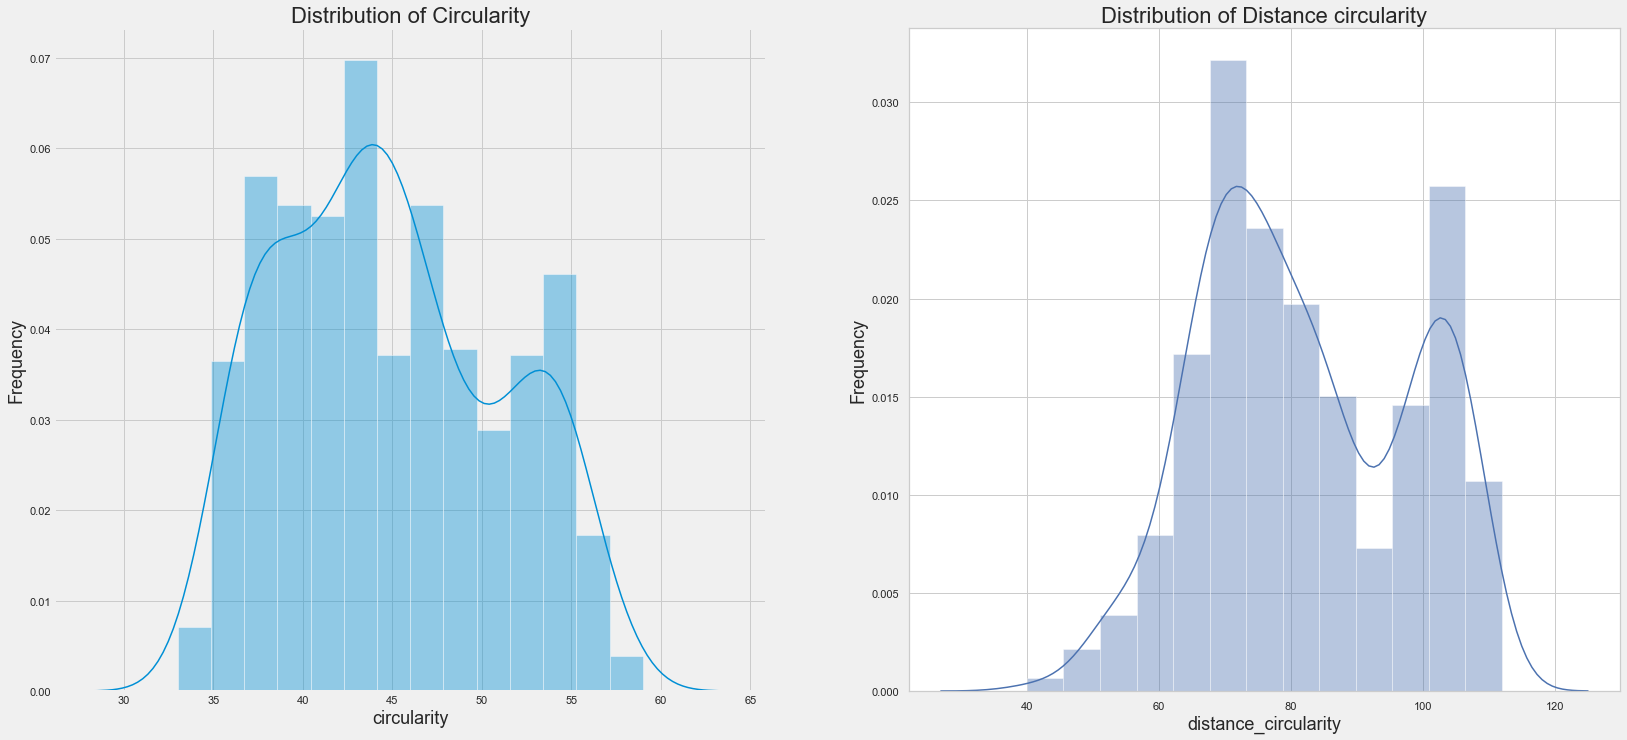

In [222]:
plt.figure(figsize=(25,25))

plt.subplot(2,2,1)
sns.set(style='whitegrid')
sns.distplot(df['circularity'].dropna())
plt.title('Distribution of Circularity', fontsize=22)
plt.xlabel('circularity', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(2,2,2)
sns.set(style='whitegrid')
sns.distplot(df['distance_circularity'].dropna())
plt.title('Distribution of Distance circularity', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('distance_circularity', fontsize=18)

The frequency distribution is done for the circularity and distance_circularity. By looking at the graph the two variables might be similar to each other. This is can be related by the pattern of KDE that is observed. The circularity and the distance_circularity relationship could have been defined by some formula as we can see that the spikes pattern are similar to each other. This can be considered as a candidate where we can reduce the dimensionality using the PCA.

Text(0, 0.5, 'Frequency')

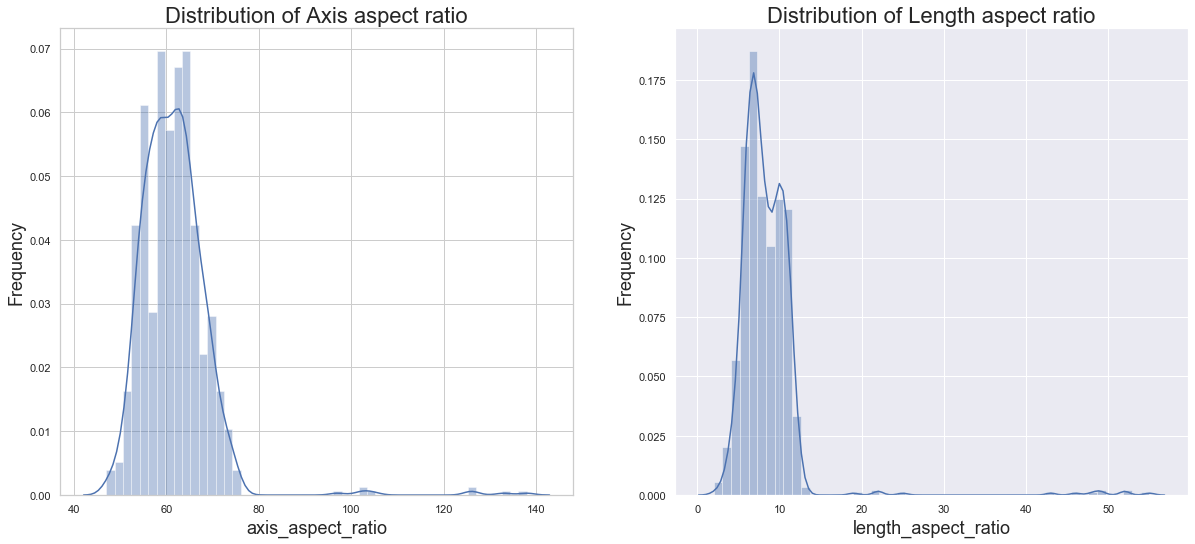

In [223]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.set(style='darkgrid')
sns.distplot(df['pr.axis_aspect_ratio'].dropna())
plt.title('Distribution of Axis aspect ratio', fontsize=22)
plt.xlabel('axis_aspect_ratio', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['max.length_aspect_ratio'].dropna())
plt.title('Distribution of Length aspect ratio', fontsize=22)
plt.xlabel('length_aspect_ratio', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

The frequency distribution is done for the axis_aspect_ratio and length_aspect_ratio. By looking at the graph the two variables have some relation between each other. The two graphs show a lot of similarities between them. The axis_aspect_ratio and the length_aspect_ratio relationship could have been defined by some formula as we can see that the spikes pattern are similar to each other. Also another factor to state this is that, both the distribution is right skewed with same kind of data distribution towards the tail. There could be a function applied to do this transformation. If such function exists then, this can be considered as a candidate where we can reduce the dimensionality using the PCA.

Text(0, 0.5, 'Frequency')

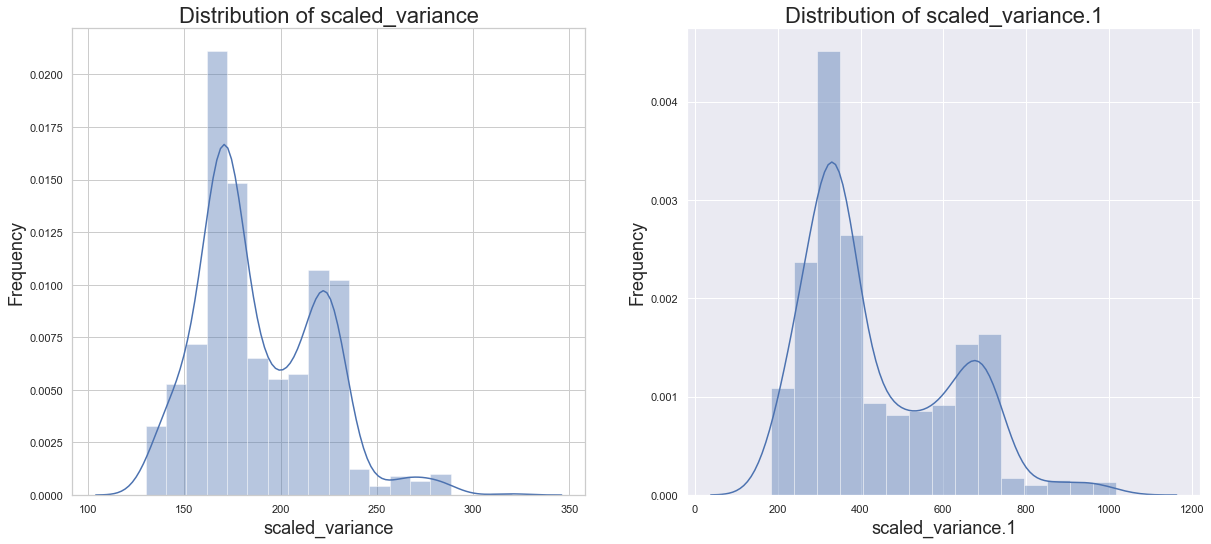

In [224]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.set(style='darkgrid')
sns.distplot(df['scaled_variance'].dropna())
plt.title('Distribution of scaled_variance', fontsize=22)
plt.xlabel('scaled_variance', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['scaled_variance.1'].dropna())
plt.title('Distribution of scaled_variance.1', fontsize=22)
plt.xlabel('scaled_variance.1', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

The frequency distribution is done for the scaled_variance and scaled_variance.1. By looking at the graph the two variables might have some relation between each other. The two graphs show a lot of similarities between them. The scaled_variance and the scaled_variance.1 relationship could have been defined by some formula as we can see that the spikes pattern are similar to each other. Also another factor to state this is that, both the distribution is are almost same as each other with differences in the scale of the variable. There could be a function applied to do this transformation. If such function exists then, this can be considered as a candidate where we can reduce the dimensionality using the PCA.

Text(0, 0.5, 'Frequency')

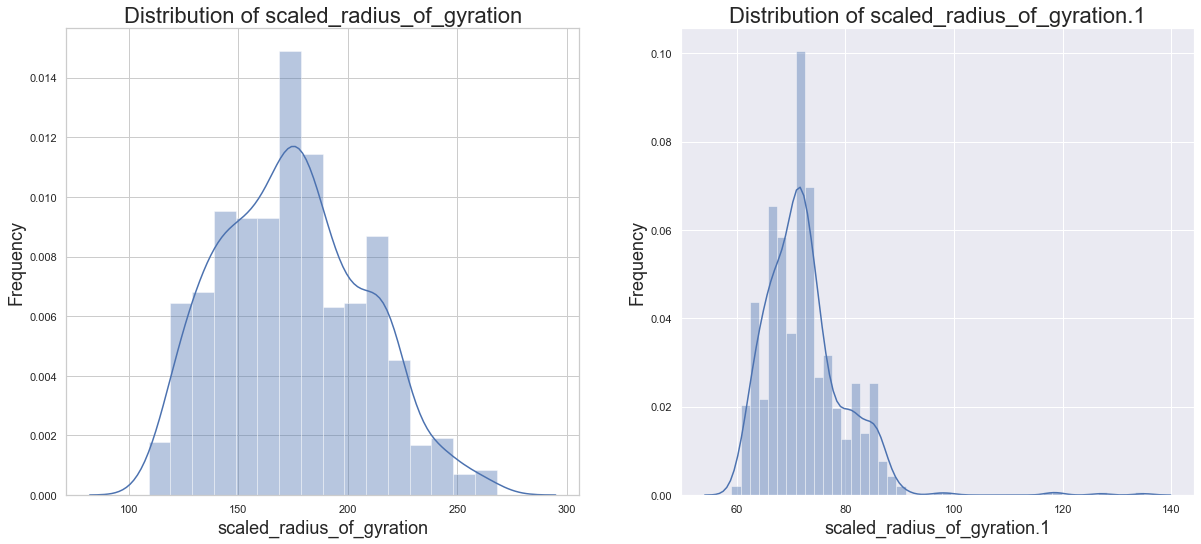

In [225]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.set(style='darkgrid')
sns.distplot(df['scaled_radius_of_gyration'].dropna())
plt.title('Distribution of scaled_radius_of_gyration', fontsize=22)
plt.xlabel('scaled_radius_of_gyration', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['scaled_radius_of_gyration.1'].dropna())
plt.title('Distribution of scaled_radius_of_gyration.1', fontsize=22)
plt.xlabel('scaled_radius_of_gyration.1', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

The frequency distribution is done for the scaled_radius_of_gyration and scaled_radius_of_gyration.1. By looking at the graph the two variables might have some relation between each other. There are slight variations in the bins for the two graphs. But if we check the KDE for it, againg there might be indication that it could be related. The scaled_radius_of_gyration and the scaled_radius_of_gyration.1 relationship could have been defined by some formula as we can see that the spikes pattern are similar to each other. There could be a function applied to do this transformation. If such function exists then, this can be considered as a candidate where we can reduce the dimensionality using the PCA.

In [226]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


Text(0, 0.5, 'Frequency')

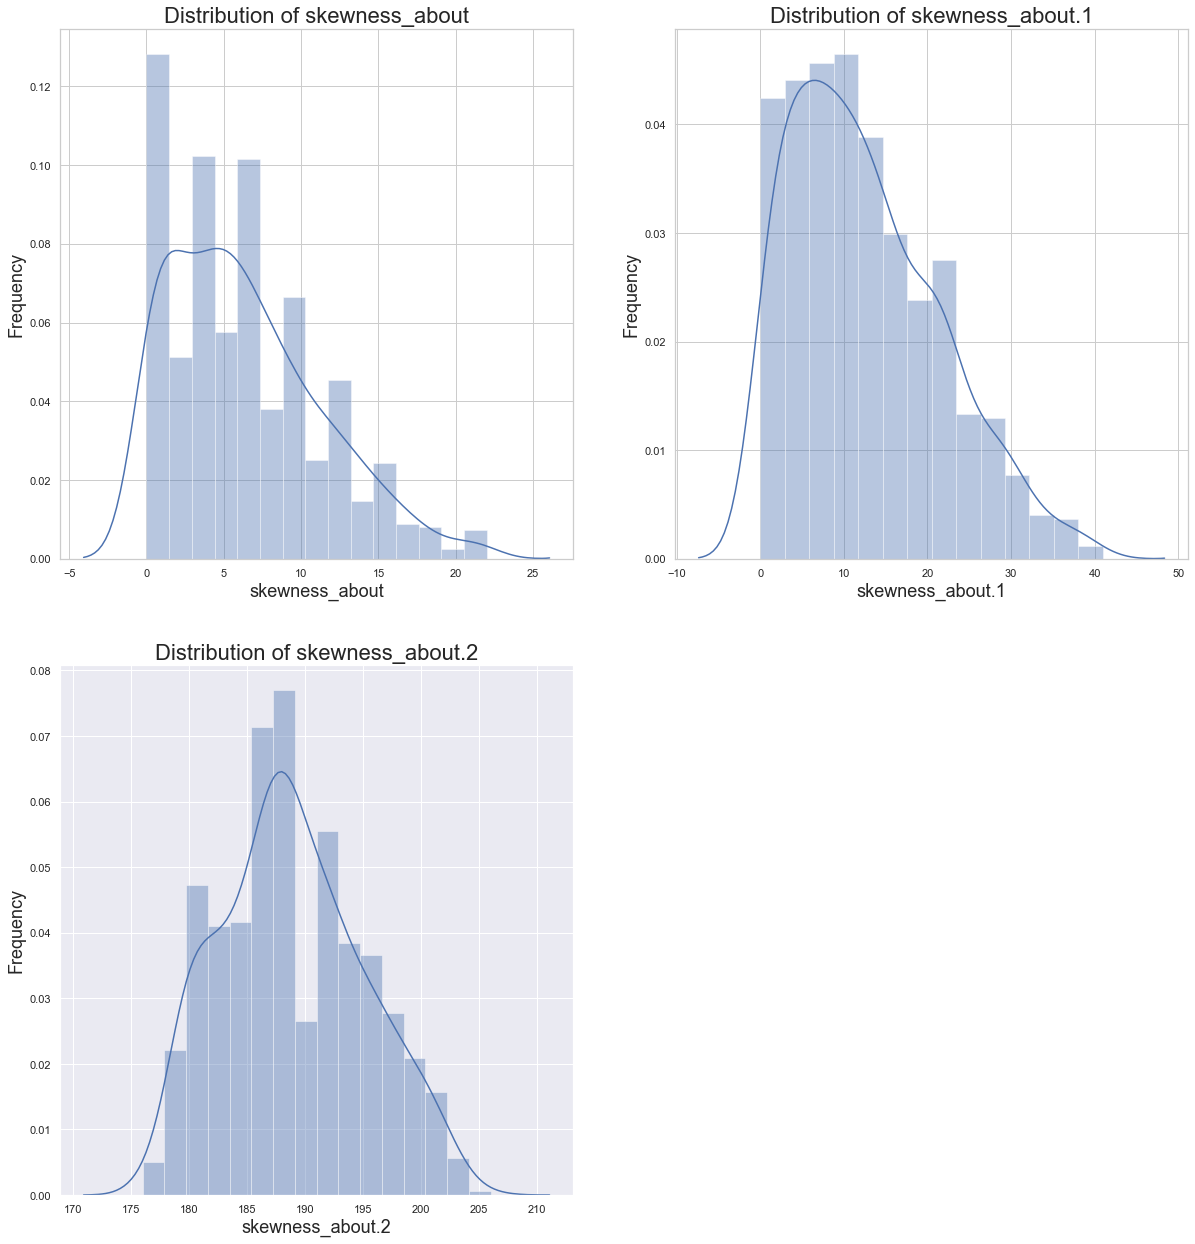

In [227]:
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
sns.set(style='whitegrid')
sns.distplot(df['skewness_about'].dropna())
plt.title('Distribution of skewness_about', fontsize=22)
plt.xlabel('skewness_about', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(2,2,2)
sns.set(style='darkgrid')
sns.distplot(df['skewness_about.1'].dropna())
plt.title('Distribution of skewness_about.1', fontsize=22)
plt.xlabel('skewness_about.1', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.subplot(2,2,3)
sns.set(style='whitegrid')
sns.distplot(df['skewness_about.2'].dropna())
plt.title('Distribution of skewness_about.2', fontsize=22)
plt.xlabel('skewness_about.2', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

All the three variables show a similar pattarn i.e. gradual increase in the feature variable followed by a steep decrease. We can also visualise the symmetric nature ( almost symmetrical ) in the three graphs. The three variables indicates some kind of relationship/similarities i.e. relationship could have been defined by some formula as we can see that the spikes pattern are similar to each other. There could be a function applied to do this transformation. If such function exists then, this can be considered as a candidate where we can reduce the dimensionality using the PCA.

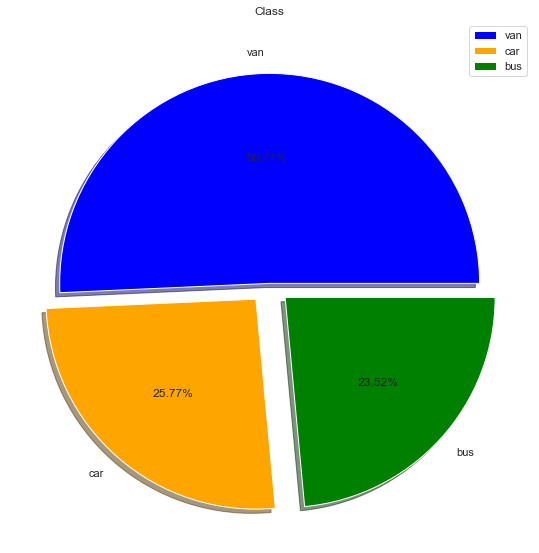

In [228]:
labels = df['class'].unique()
size = df['class'].value_counts()
colors = ['blue', 'orange', 'green']
explode = [0,0.1, 0.1]

plt.figure(figsize=(9,9))
plt.pie(x= size, colors=colors, explode=explode, shadow=True,autopct='%.2f%%', labels=labels)
plt.title('Class')
plt.legend()

The pie chard shows that half of the data (51%) set classification is dominated by the Van class. The car and bus classes are equally distributed with approximately 26% and 24%
We can also state from this that given certain values, the probability of it being detected as Van is high than that compared to the bus and car.

In [229]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


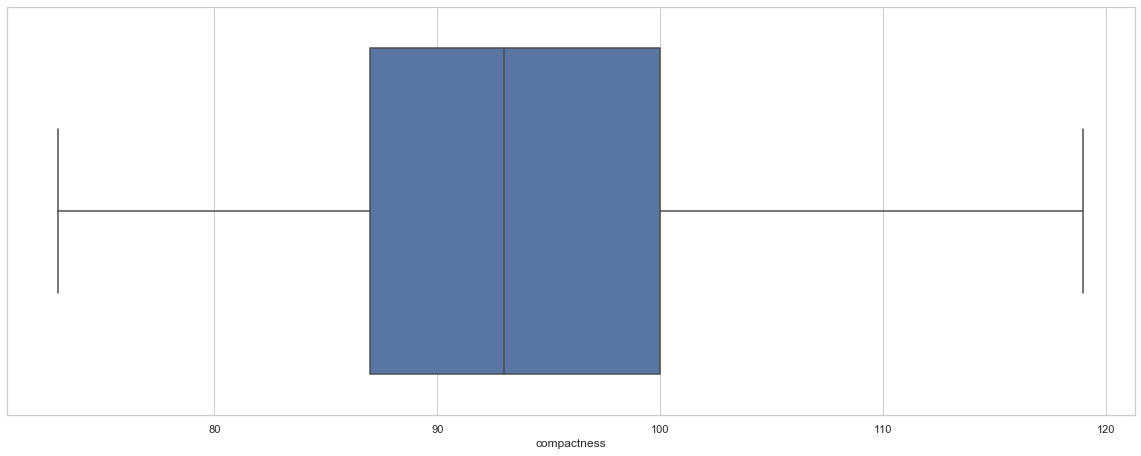

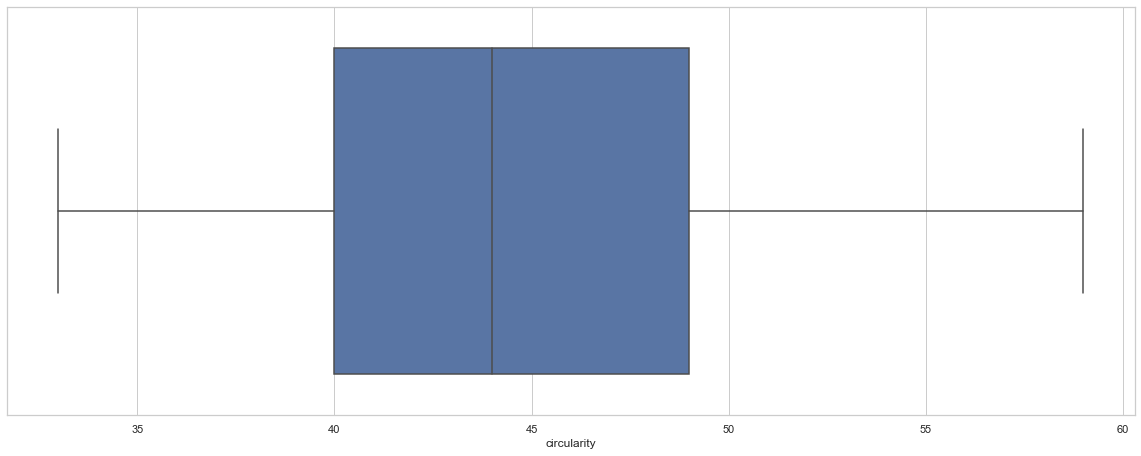

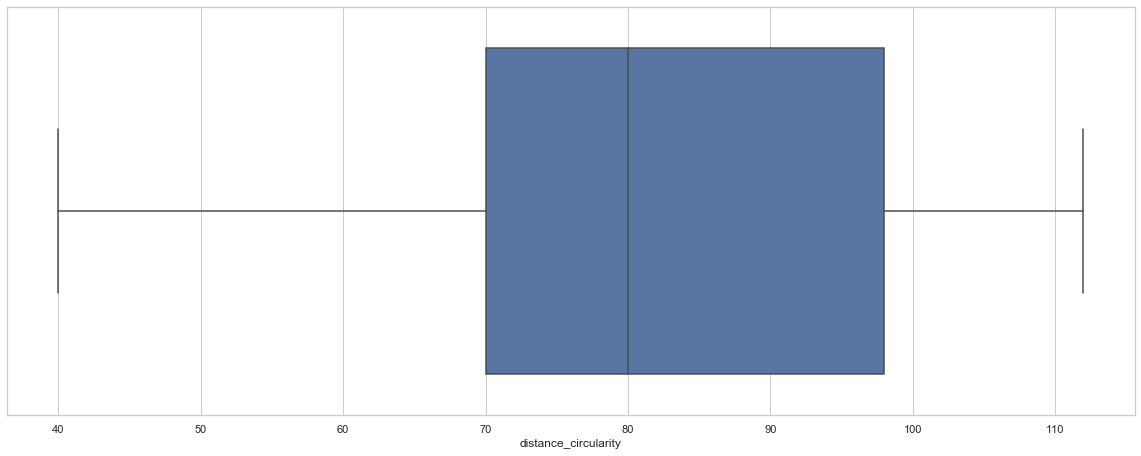

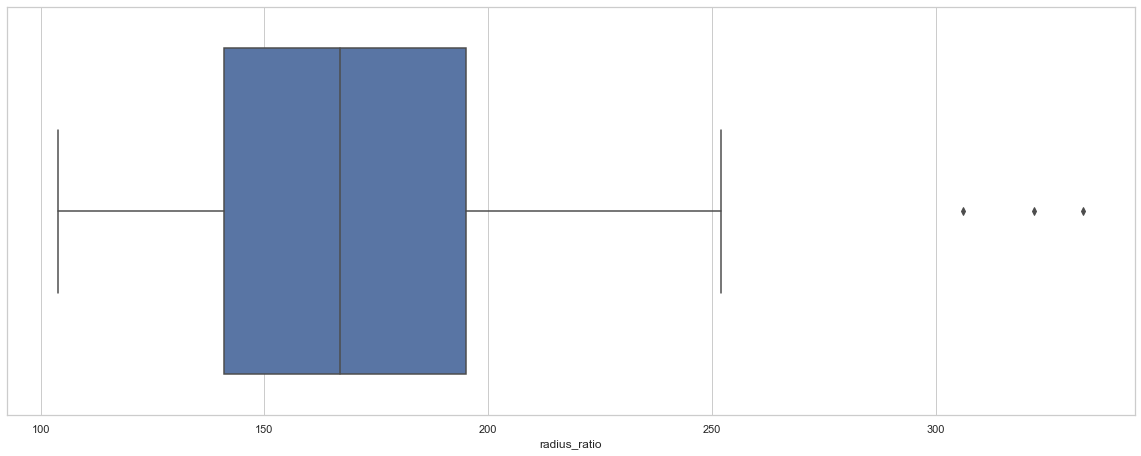

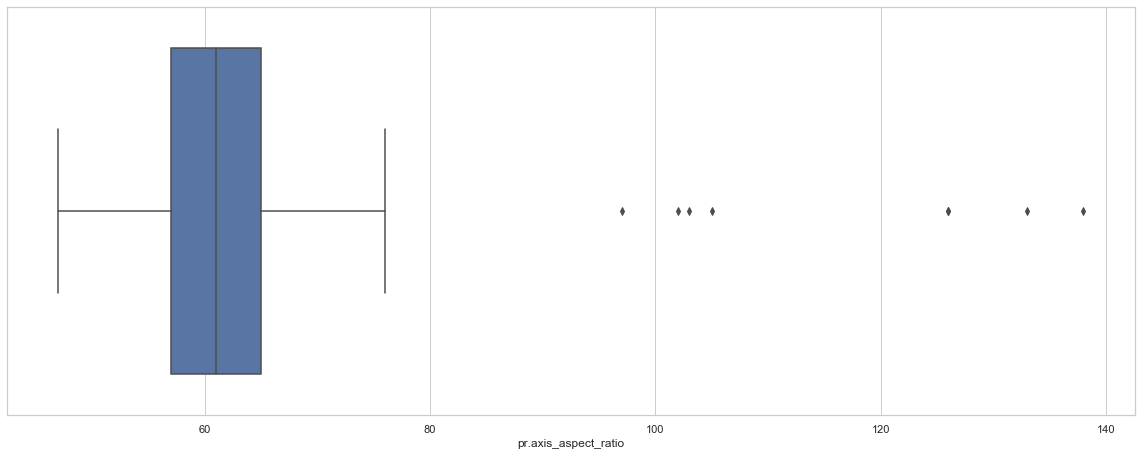

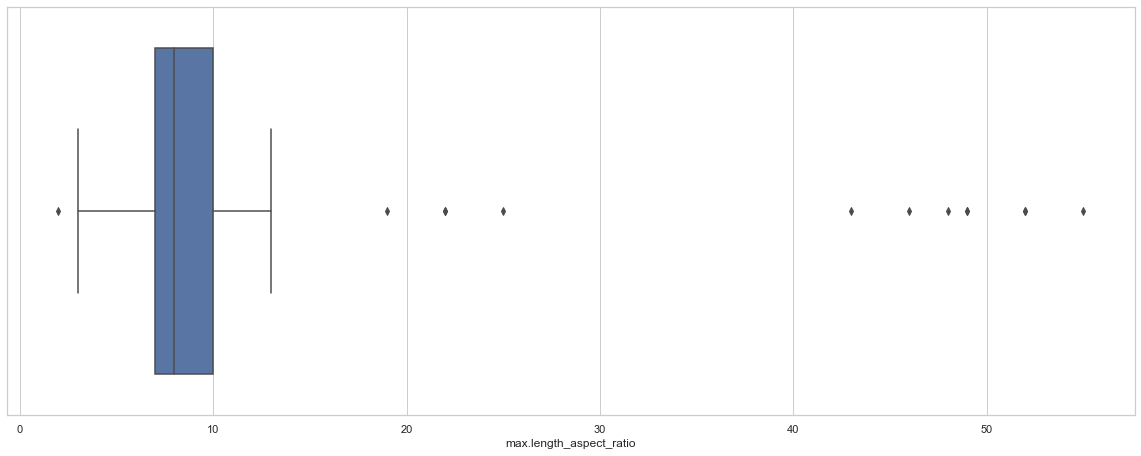

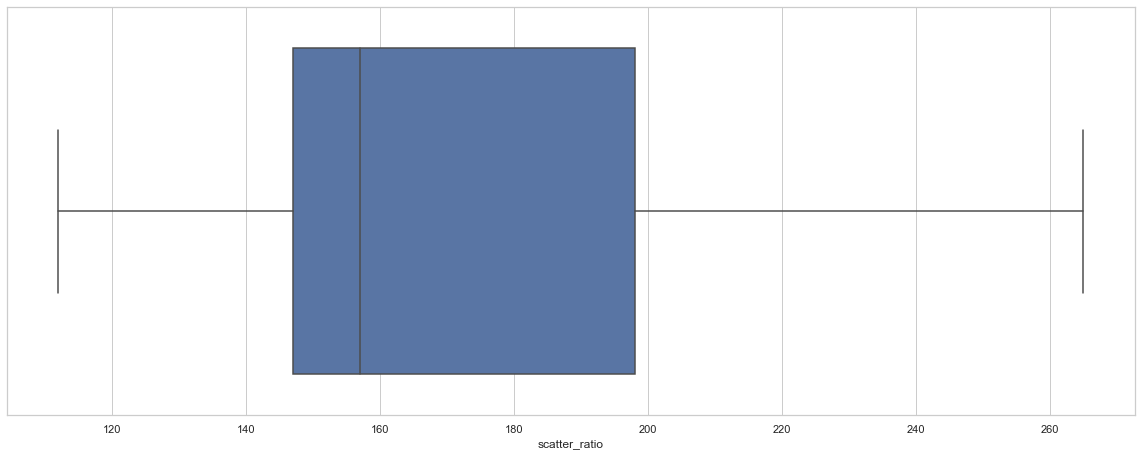

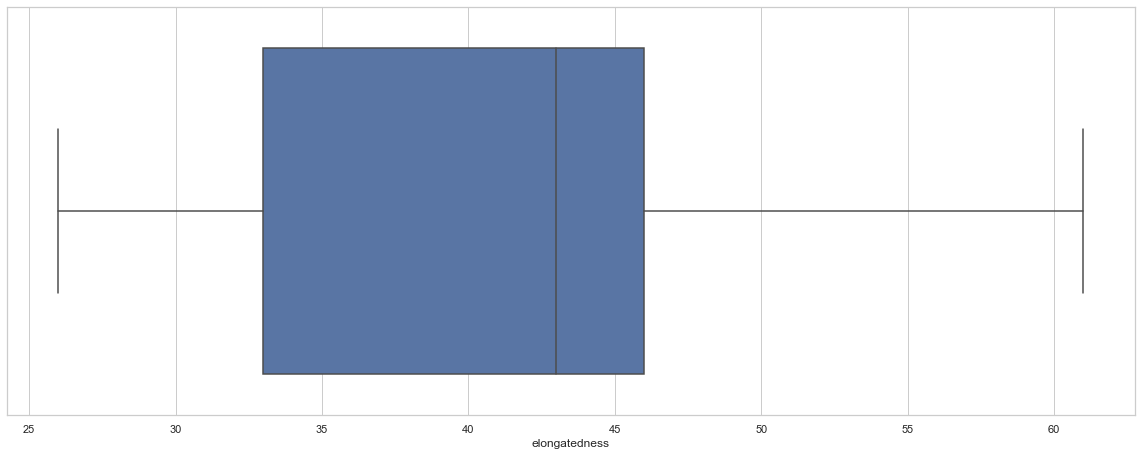

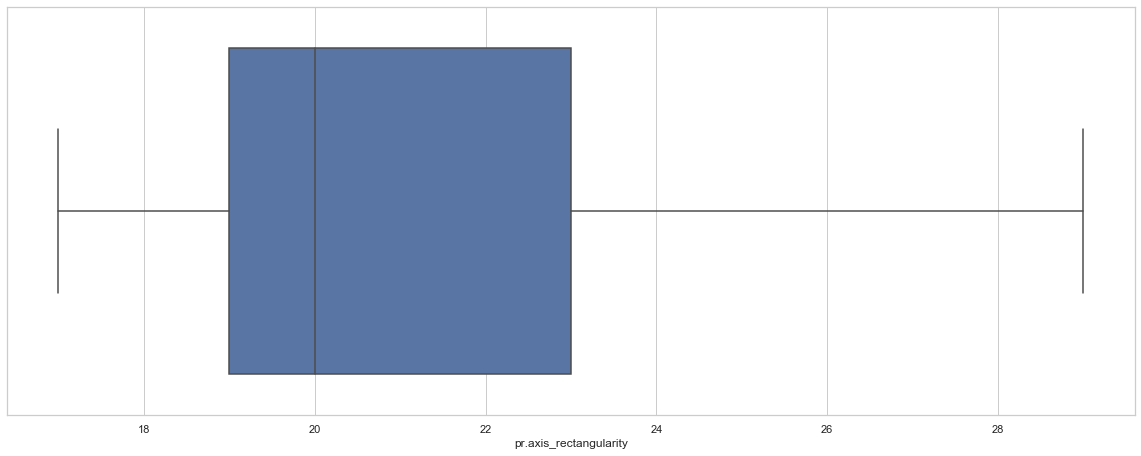

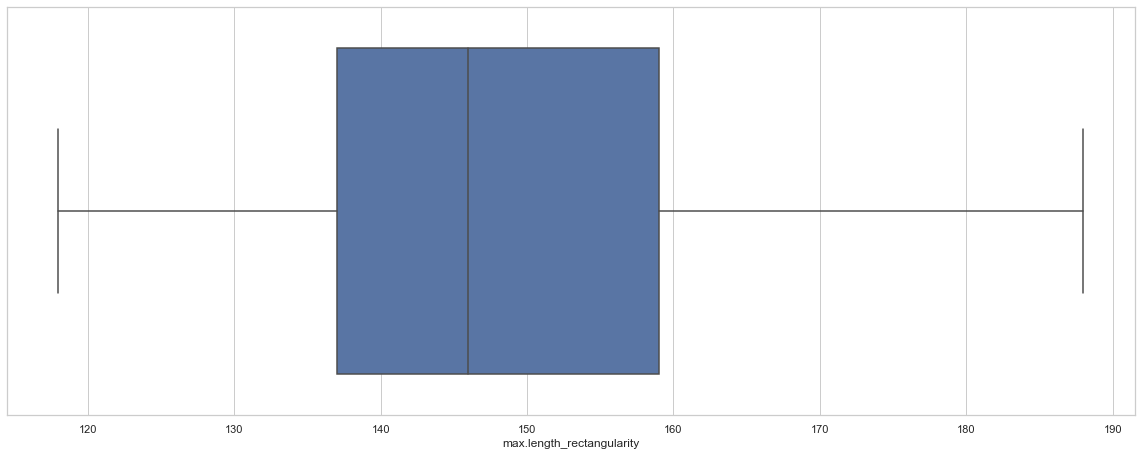

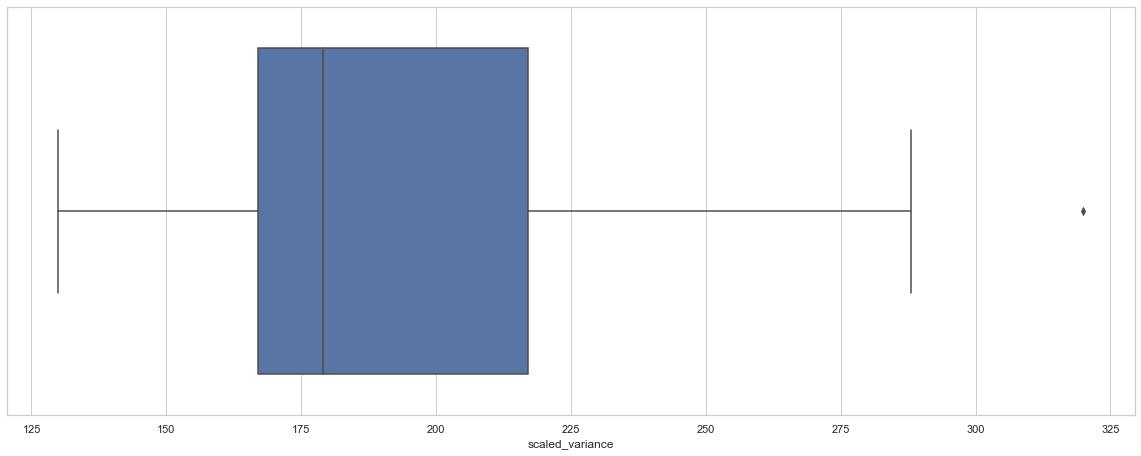

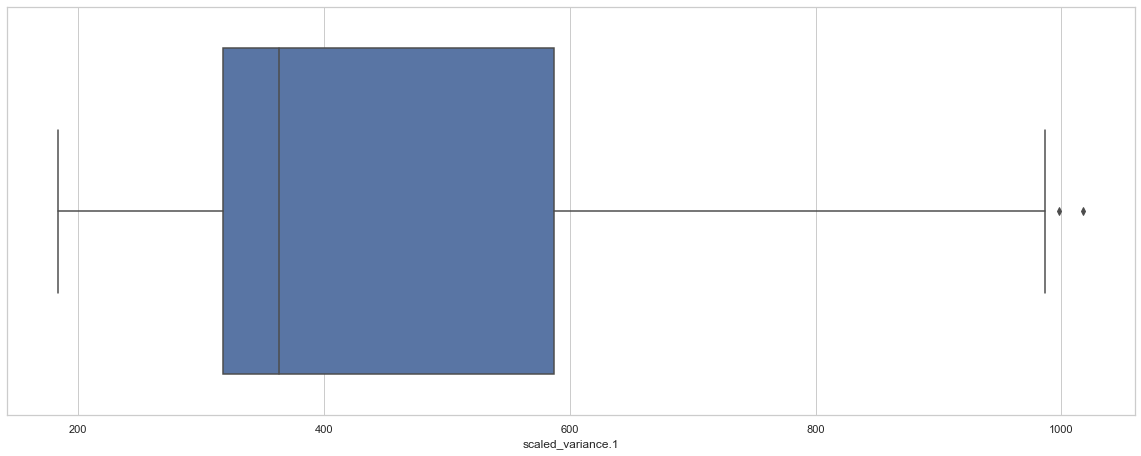

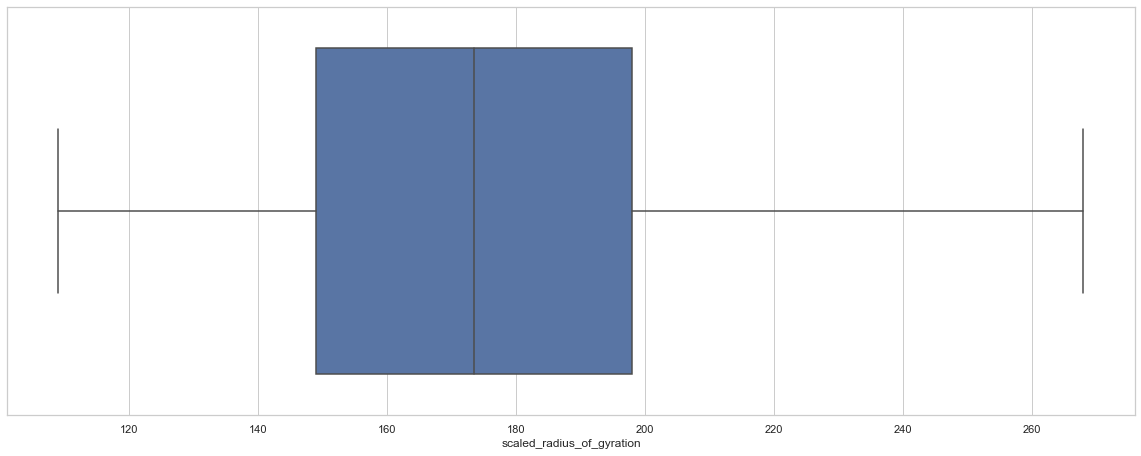

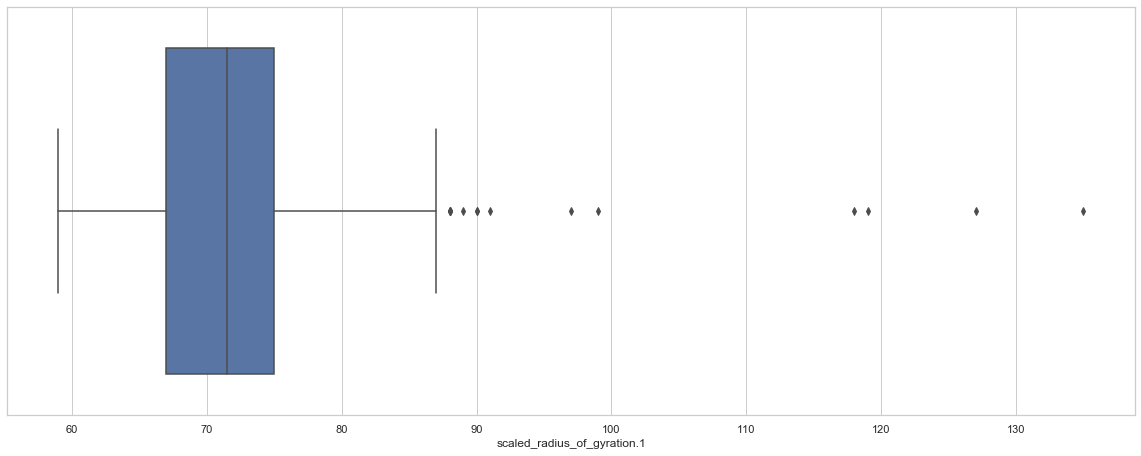

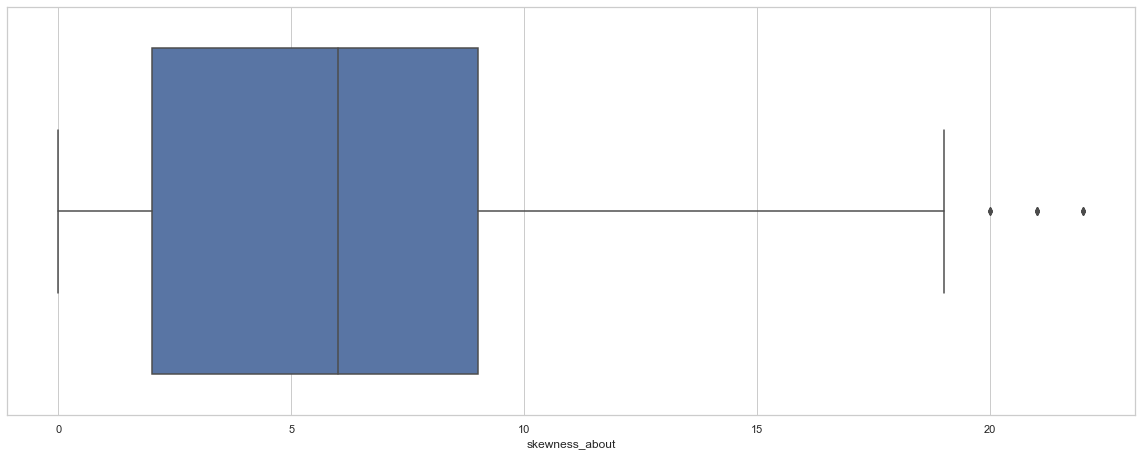

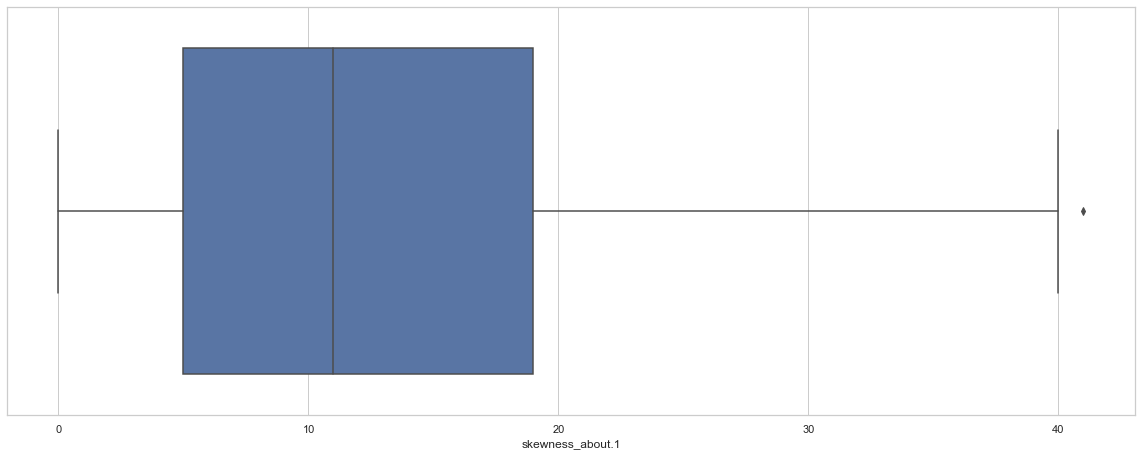

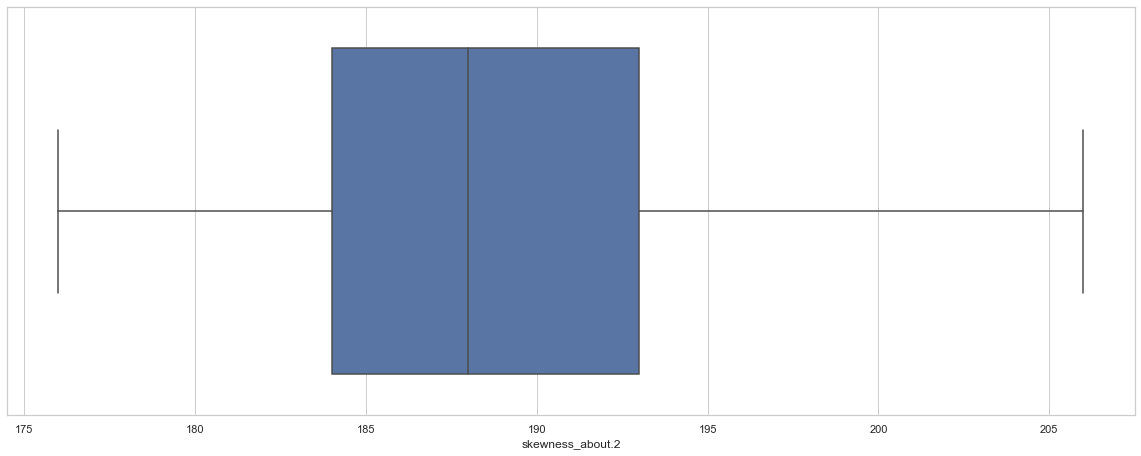

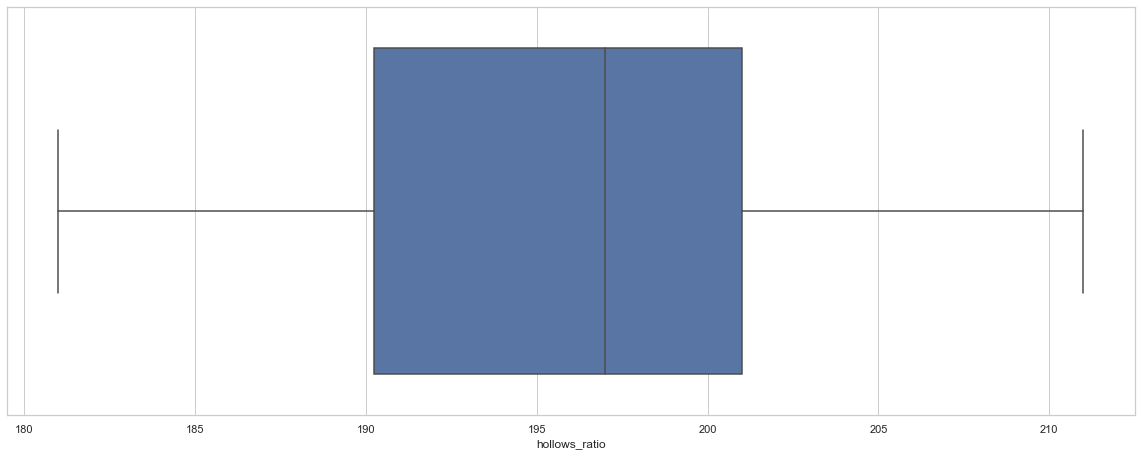

In [230]:
for col in df.drop('class', axis=1):
    plt.figure(figsize=(18,7))
    sns.boxplot(df[col])
    plt.show()

#### Box plot breakdown:
1. compactness: We can see that the compactness has a mean of 93.67. The box plot shows that the data is symmetrical without any skew.
2. circularity: The circularity has a mean of 44.82. There are no outliers present in the observation. The distribution is very slightly right skewed.
3. distance_circularity: This distance circularity has a mean of 82.11 and the box plot shows that it is right skewed. There are no presence of outliers. If distance_circularity is a result obtained by applying some function on circularity, then it has introduced a skeweness on the original data.
4. radius_ratio: The radius_ratio has a mean of 168.88. The box plot indicates the presence of outliers. There are a few radius_ratio whose value extends more than 195.
5. pr.axis_aspect_ratio: The pr.axis_aspect_ratio shows a mean of 61.67. The box plot shows a symmetry but with presence of outliers.
6. max.length_aspect_ratio: This max.length_aspect_ratio has a mean of 8.56 and the box plot shows that it is right skewed. There are also presence of outliers. If max.length_aspect_ratio is a result obtained by applying some function on pr.axis_aspect_ratio, then it has increased skewness and outliers from the original data.
7. scatter_ratio: The scatter_ratio has a mean of 168.90. There are no presence of any outliers. The box plot shows that the data is skewed towards the right.
8. elongatedness: The scatter_ratio has a mean of 40.93. There are no presence of any outliers. The box plot shows that the data is skewed towards the left.
9. pr.axis_rectangularity: The pr.axis_rectangularity has a mean of 20.58. There are no presence of any outliers. The box plot shows that the data is skewed towards the right.
10. max.length_rectangularity: The max.length_rectangularity has a mean of 147.99. There are no presence of any outliers. The box plot shows that the data is slightyl skewed towards the right.
11. scaled_variance: The scaled_variance shows presence of outlier and the mean value is 188.63. The data is skewed to the right.
12. scaled_variance.1: The scaled_variance.1 shows that outlier has increased from the scaled_variance variance and the skewness has also increased with it. If scaled_variance.1 is a result obtained by applying some function on scaled_variance, then it has increased skewness and outliers from the original data.
13. scaled_radius_of_gyration: The scaled_radius_of_gyration has a mean of 174.70. The data is symmetrical with no outliers.
14. scaled_radius_of_gyration.1: The scaled_radius_of_gyration.1 has a mean of 72.44. The box plot shows a lot of outliers and the data is left skewed. If scaled_radius_of_gyration.1 is a result obtained by applying some function on scaled_radius_of_gyration, then it has increased skewness and outliers from the original data.
15. skewness_about: The skewness_about has a mean of 6.36. There are presnce of outliers, and the distribution is slightly skewed to the left.
16. skewness_about.1: The skewness_about.1 has a mean of 12.60. There are presnce of outliers, and the distribution is slightly skewed to the right. If skewness_about.1 is a result obtained by applying some function on skewness_about, then it has decresed the skewness and outliers from the original data.
17. skewness_about.2: The skewness_about has a mean if 188.91. There are no outliers and the data appears to be symmetrically distributed. If skewness_about.2 is a result obtained by applying some function on skewness_about, then it has decresed the skewness and outliers from the original data.
18. hollows_ratio: hollows_ratio has a mean of 195.63. The box plot shows that there are no presence of any outliers and the data is skewed towards the left.

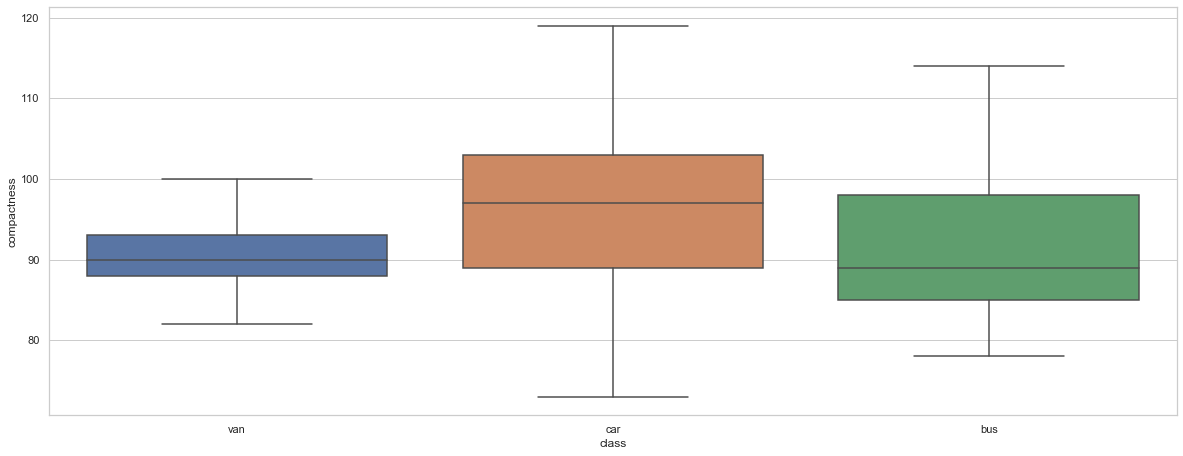

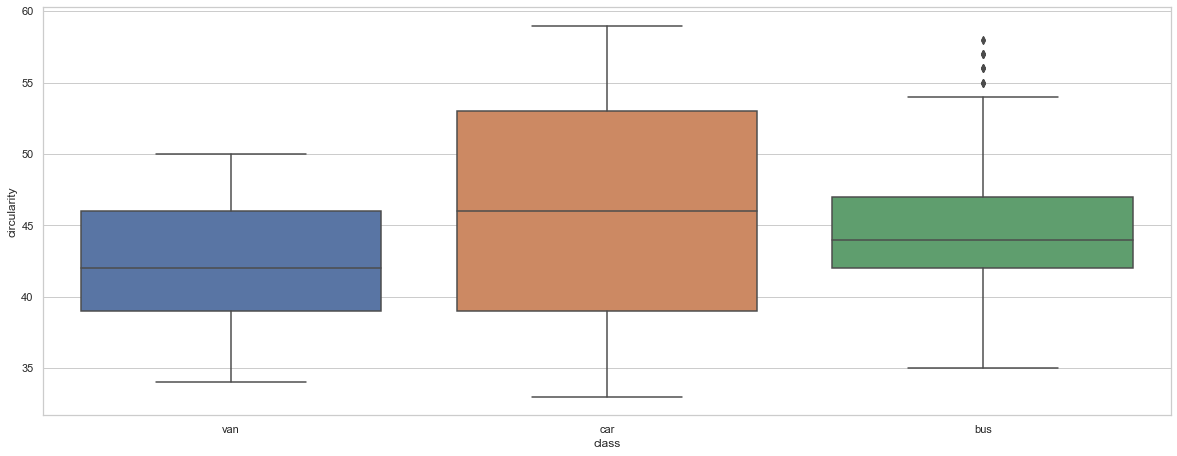

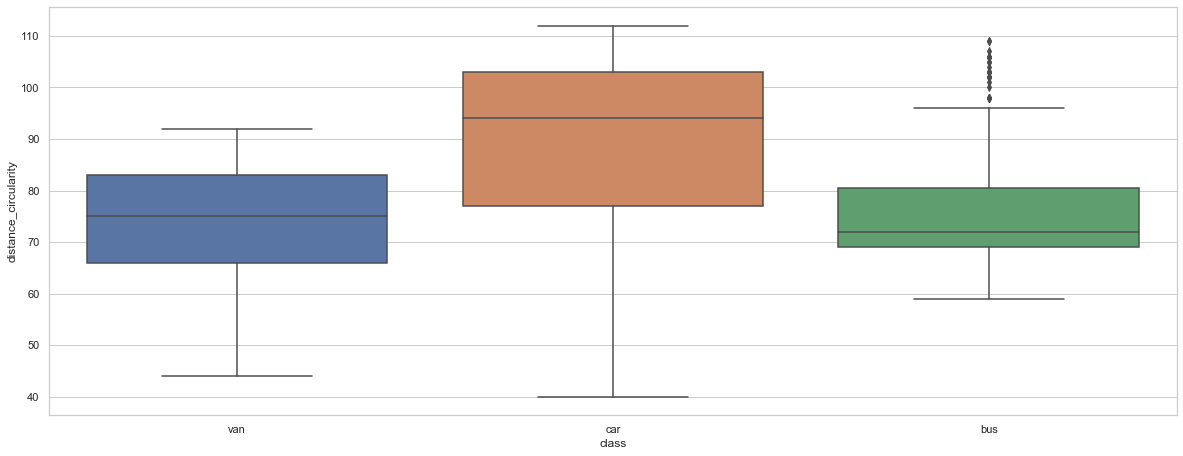

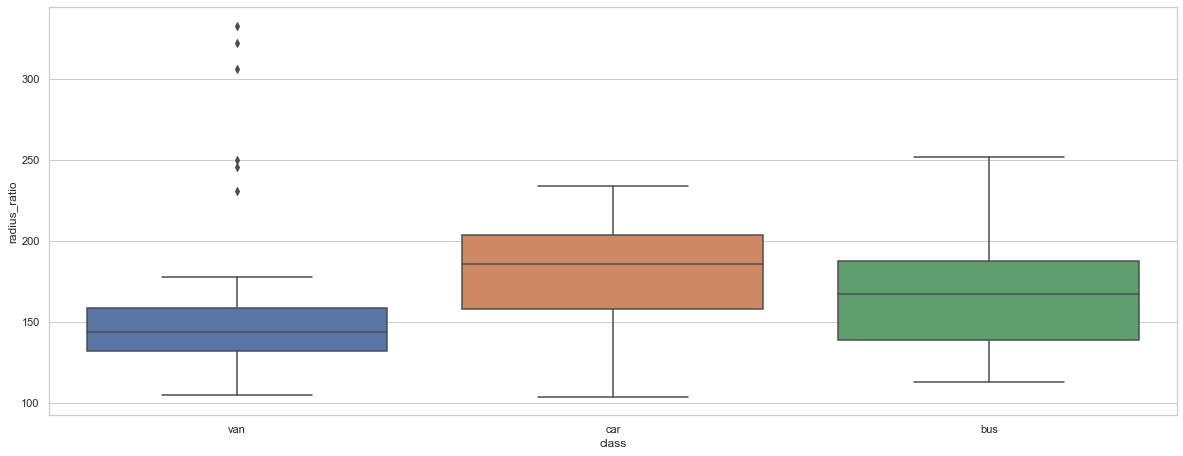

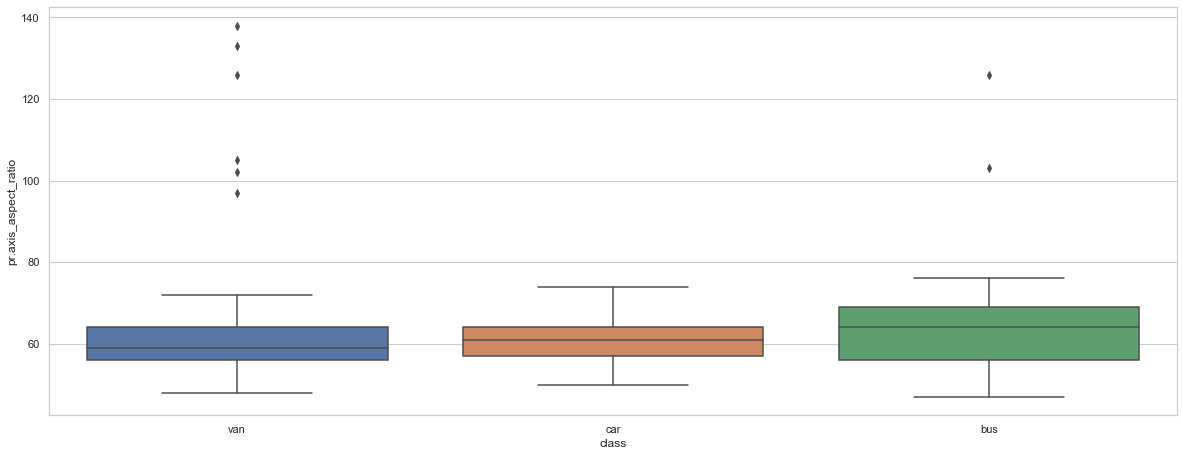

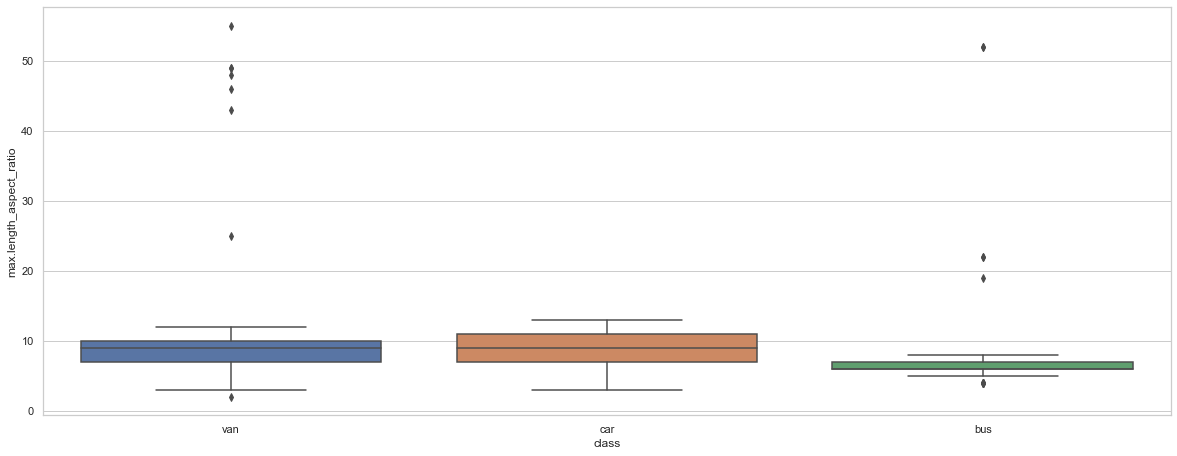

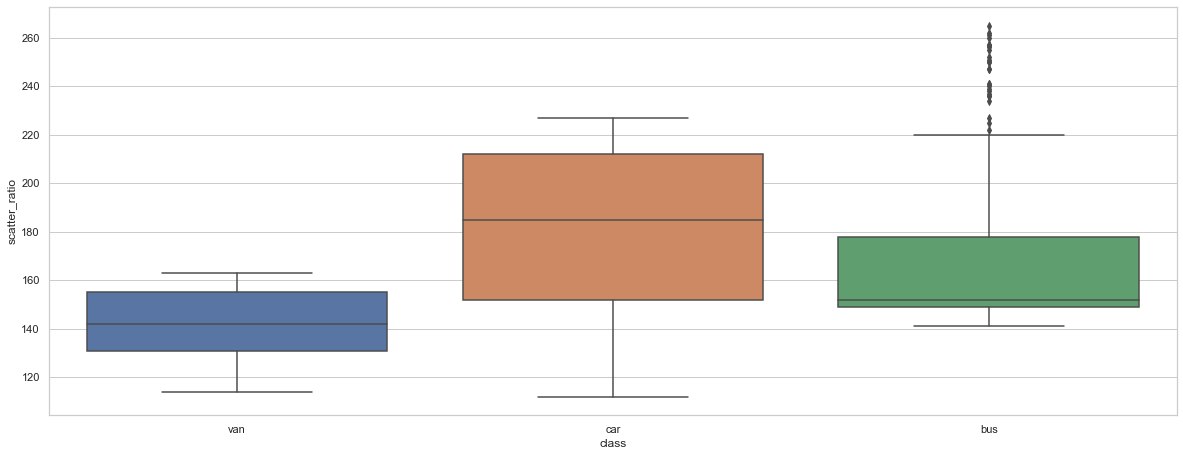

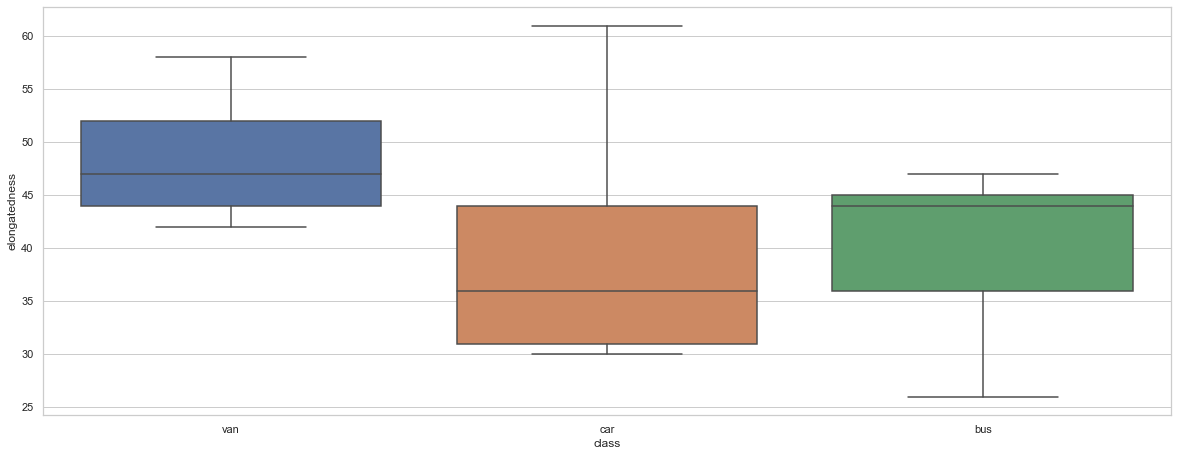

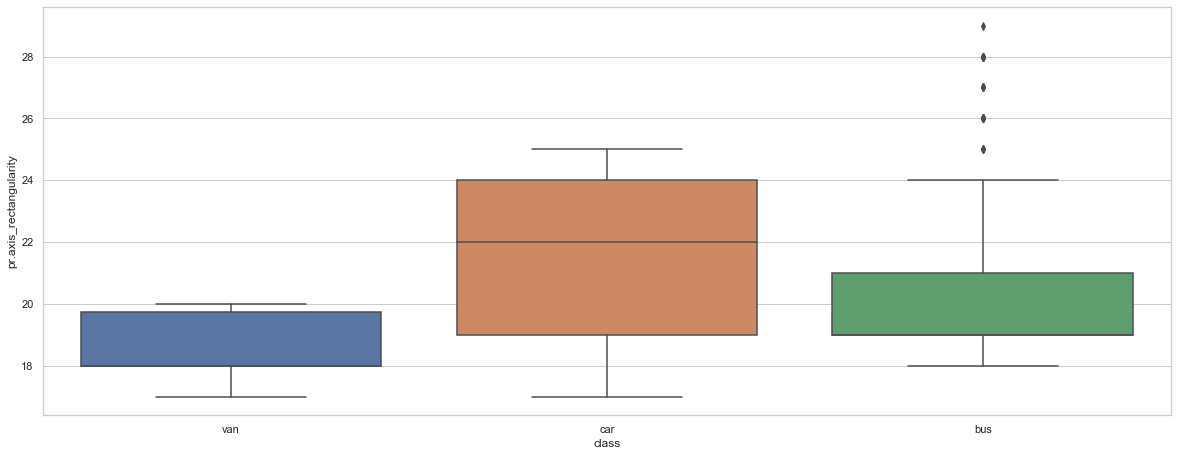

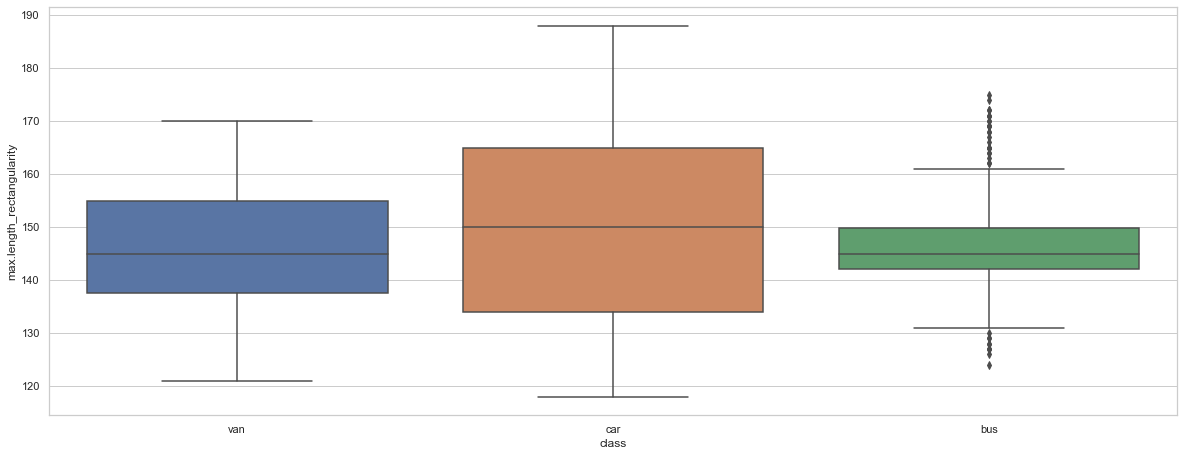

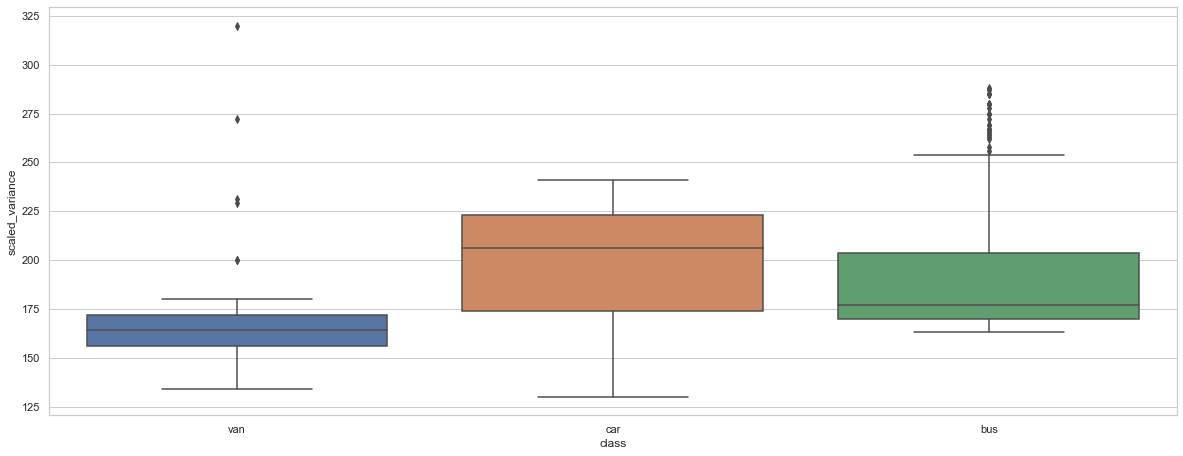

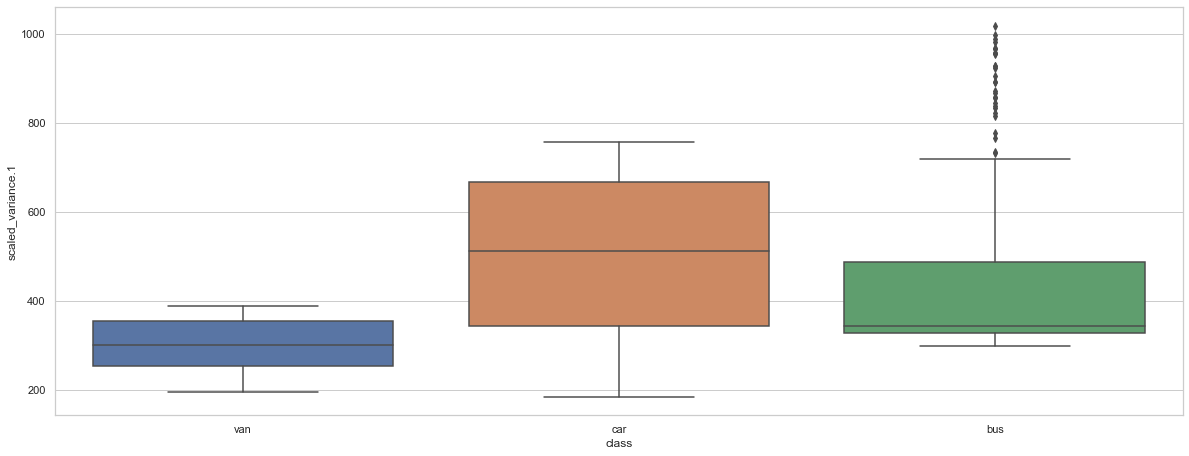

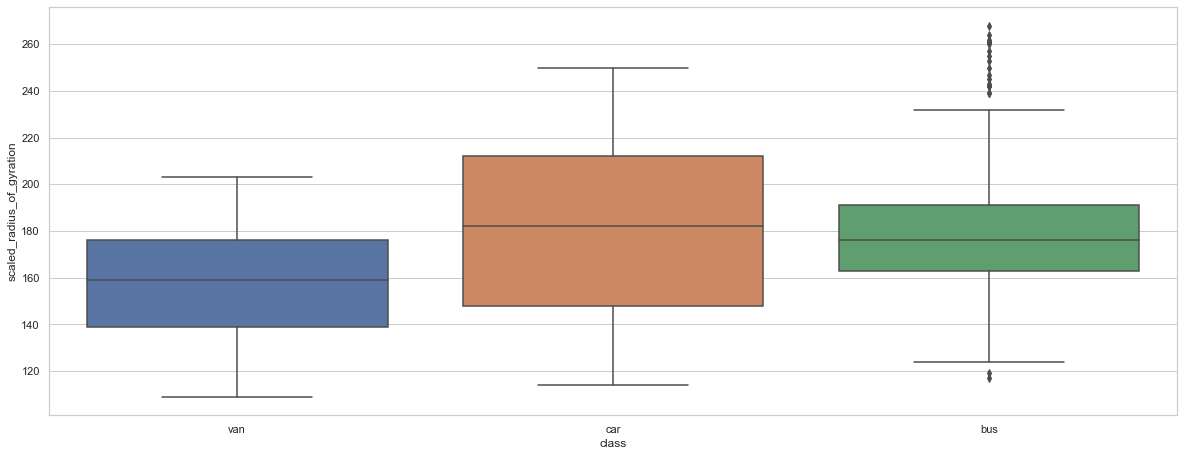

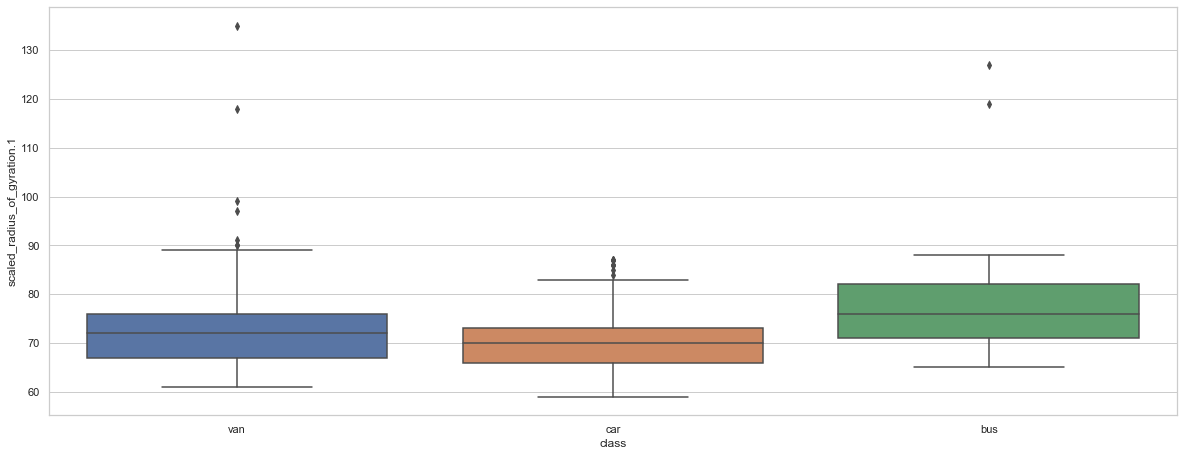

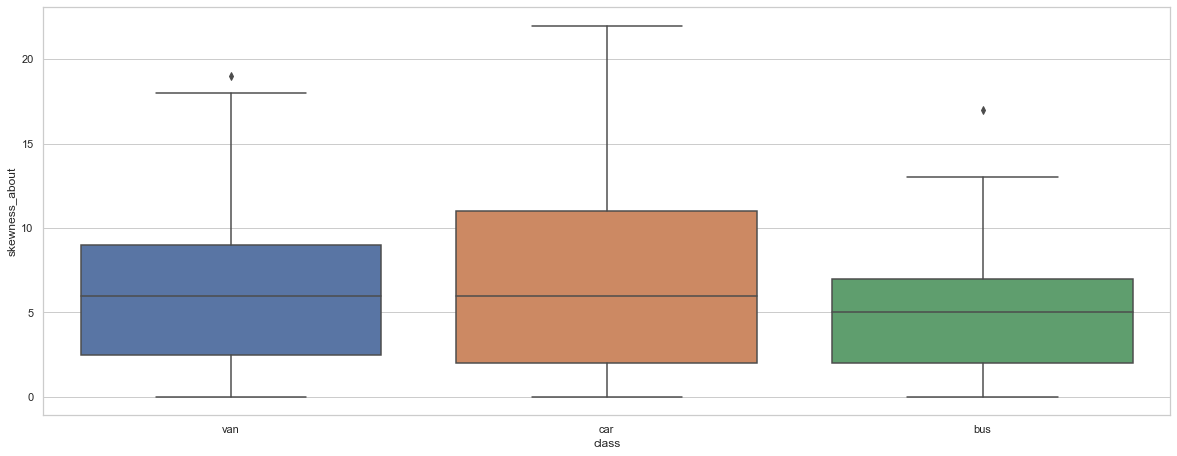

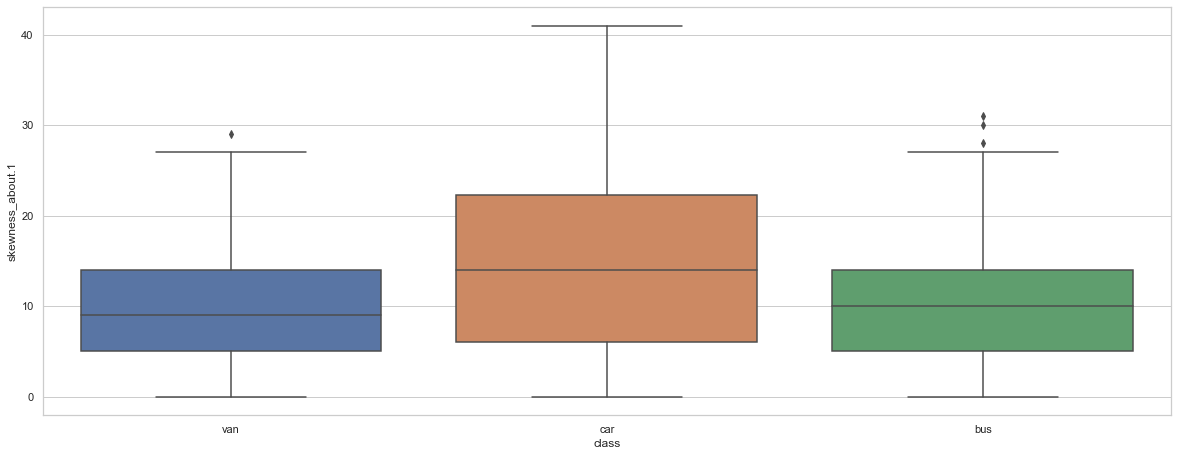

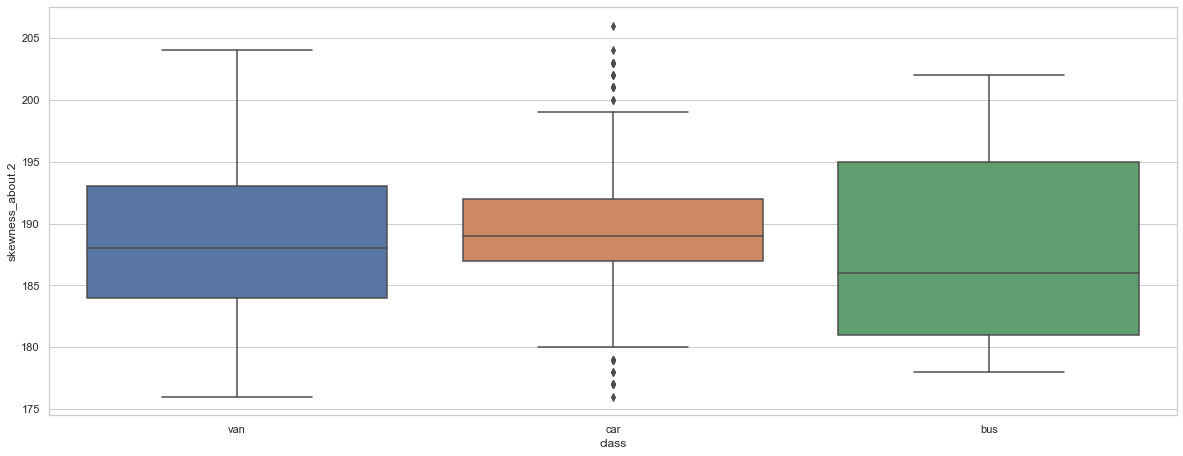

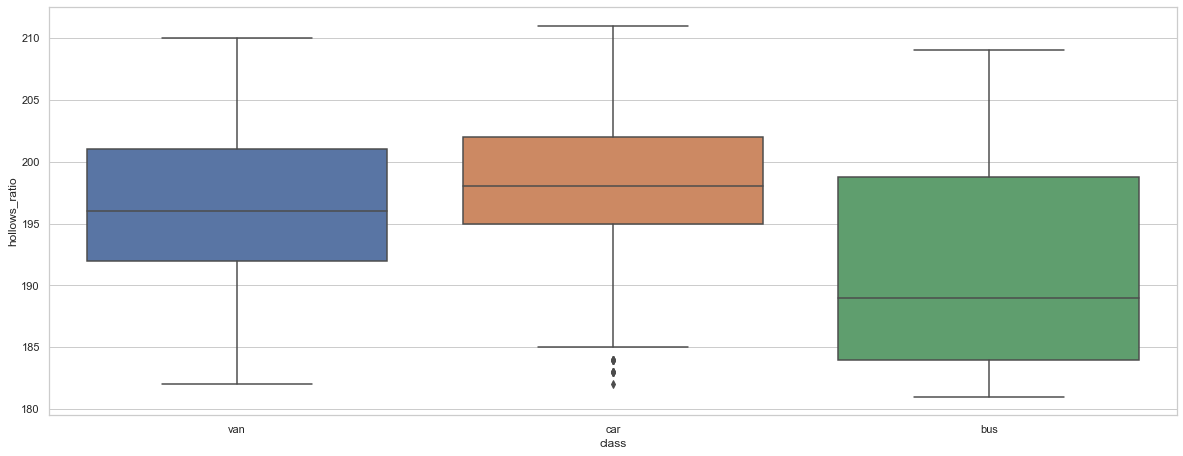

In [231]:
for col in df.drop('class', axis=1):
    plt.figure(figsize=(18,7))
    sns.boxplot(x=df['class'], y=df[col])
    plt.show()

#### Box plot beakdown with respect to class:
Here we did a box plot for all the columns w.r.t. the class(bus, car, van). By observing all the plots, more number of outliers are present for the bus classifications. The car has the least number of outliers

By observing the box plot analysis, we can proceed with the following columns:
[compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_radius_of_gyration, skewness_about_2, hollows_ratio, class]

## Treating Missing Values

In [232]:
cols = ['compactness', 'circularity', 
 'distance_circularity', 'radius_ratio', 
 'pr.axis_aspect_ratio', 
 'max.length_aspect_ratio', 'scatter_ratio', 
 'elongatedness', 'pr.axis_rectangularity', 
 'max.length_rectangularity', 'scaled_variance', 
 'scaled_radius_of_gyration', 
 'skewness_about.2', 'hollows_ratio']
X = df[cols]
y = df['class']

In [233]:
X.isna().sum()

compactness                  0
circularity                  5
distance_circularity         4
radius_ratio                 6
pr.axis_aspect_ratio         2
max.length_aspect_ratio      0
scatter_ratio                1
elongatedness                1
pr.axis_rectangularity       3
max.length_rectangularity    0
scaled_variance              3
scaled_radius_of_gyration    2
skewness_about.2             1
hollows_ratio                0
dtype: int64

In [234]:
for col in X.columns:
    X[col].fillna(X[col].mean(), inplace = True)
    X[col] = X[col].astype('float64')

In [235]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 14 columns):
compactness                  846 non-null float64
circularity                  846 non-null float64
distance_circularity         846 non-null float64
radius_ratio                 846 non-null float64
pr.axis_aspect_ratio         846 non-null float64
max.length_aspect_ratio      846 non-null float64
scatter_ratio                846 non-null float64
elongatedness                846 non-null float64
pr.axis_rectangularity       846 non-null float64
max.length_rectangularity    846 non-null float64
scaled_variance              846 non-null float64
scaled_radius_of_gyration    846 non-null float64
skewness_about.2             846 non-null float64
hollows_ratio                846 non-null float64
dtypes: float64(14)
memory usage: 92.6 KB


# Scaling

In [236]:
X_scaled = X.apply(zscore)

# Principle Component Analysis and Dimensionality reduction

In [237]:
cov_matrix = np.cov(X_scaled, rowvar=False)
print(cov_matrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.58584865
   0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.92798524
  -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.70678835
   0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.5371705
   0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948935  0.12727847  0.27373802  0.12225517
   0.24013301  0.26804079]
 [ 0.14842463  0.25150523  0.26486339  0.45056889  0.64947191  1.00118343
   0.16616348 -0.18025396  0.16178281  0.30630475  0

In [238]:
X_scaled.shape[1]

14

In [239]:
pca = PCA(n_components=X_scaled.shape[1])

In [240]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [241]:
print(pca.explained_variance_)

[8.44242374e+00 2.43051429e+00 1.55614564e+00 5.45620387e-01
 4.16287555e-01 2.34214269e-01 1.33693727e-01 9.28585176e-02
 5.17325241e-02 3.33587734e-02 3.00285677e-02 2.44941620e-02
 1.89248935e-02 6.27099628e-03]


In [242]:
eigen_vector_dataframe = pd.DataFrame(data=pca.components_, columns=X.columns)
eigen_vector_dataframe['Explained Variance'] =pca.explained_variance_ratio_
eigen_vector_dataframe

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_radius_of_gyration,skewness_about.2,hollows_ratio,Explained Variance
0,0.288637,0.311918,0.320403,0.285539,0.094054,0.110901,0.331559,-0.330017,0.328231,0.301080,0.325568,0.288886,0.032470,0.079553,0.602317
1,0.089073,-0.152019,0.037018,0.288893,0.360985,0.196227,-0.088463,0.012349,-0.105114,-0.140821,-0.038888,-0.233966,0.560700,0.553007,0.173403
2,-0.229333,0.042797,-0.100171,0.142744,0.560461,0.619949,-0.100162,0.098441,-0.103393,0.050620,0.047177,0.080201,-0.326475,-0.261711,0.111022
3,0.001901,-0.374442,0.003228,0.273933,0.216273,-0.276928,0.199264,-0.217273,0.177804,-0.516131,0.320082,-0.236076,-0.096450,-0.329956,0.038927
4,0.267371,-0.257917,0.232942,-0.180896,-0.429372,0.603414,0.087860,0.006306,0.121066,-0.099671,0.097207,-0.392636,-0.166792,0.052485,0.029700
5,-0.817828,-0.023718,0.407200,0.008103,-0.132758,0.012339,0.084000,-0.232143,0.034335,-0.034976,0.016374,-0.026182,-0.089591,0.273151,0.016710
6,-0.204878,-0.051709,-0.382266,-0.197812,-0.239924,0.286897,0.045454,-0.102658,0.007993,-0.202495,0.406529,0.403298,0.482054,-0.127503,0.009538
7,-0.196511,0.118061,-0.474591,-0.074825,0.052274,-0.012833,0.207266,-0.202660,0.225749,0.458595,0.042036,-0.589328,0.121792,-0.067098,0.006625
8,-0.012131,0.099365,0.479276,-0.075322,0.023774,-0.039365,-0.223243,-0.023703,-0.372082,0.208562,0.204717,-0.245287,0.397355,-0.510076,0.003691
9,-0.143429,-0.080558,0.127740,-0.013525,0.058137,-0.108077,0.035139,0.793490,0.404581,0.139328,0.346086,-0.023333,0.074805,0.038776,0.002380


<BarContainer object of 14 artists>

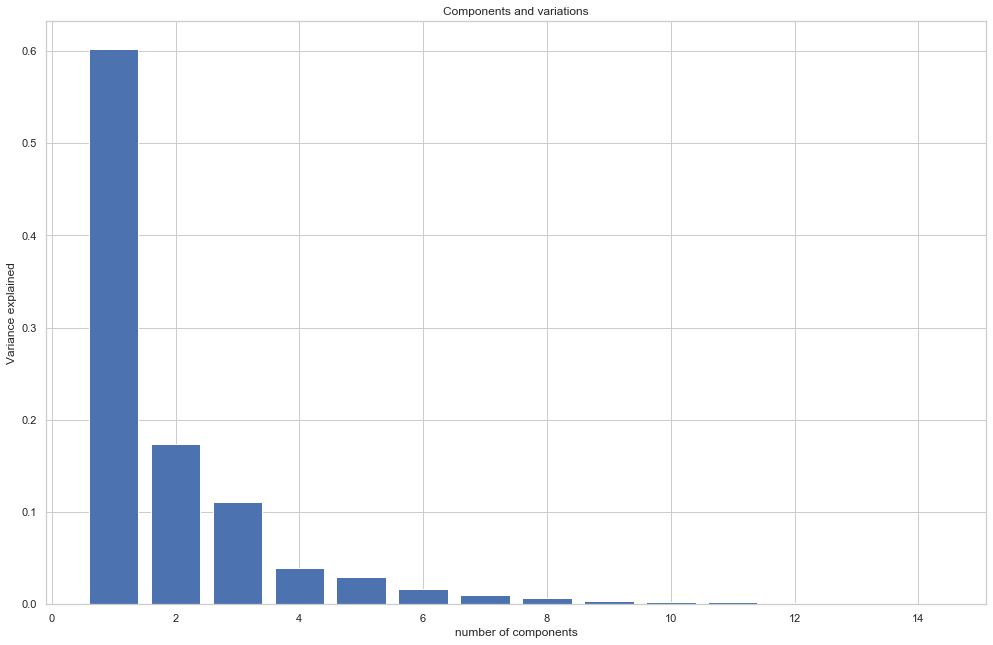

In [243]:
plt.figure(figsize=(15,10))
plt.title('Components and variations')
plt.xlabel('number of components')
plt.ylabel('Variance explained')
plt.bar(np.arange(1, X_scaled.shape[1]+1), pca.explained_variance_ratio_)

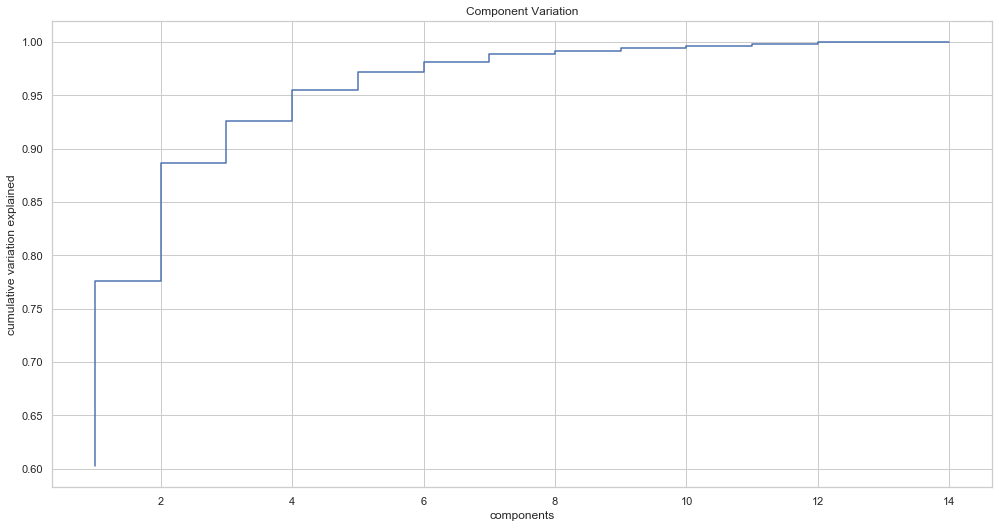

In [244]:
plt.figure(figsize=(15,8))
plt.title('Component Variation')
plt.xlabel('components')
plt.ylabel('cumulative variation explained')
plt.step(np.arange(1,X_scaled.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))

#### PCA breakdown
From the analysis of principle component analysis, we can reduce the dimension of the original data to either 5 or 6. With this we can achieve variation explainaion of more than 95%,since most of the variations are explained by these components. 
The bar plot shows that as the number of components increases beyond 5 or 6, the increase in variation explained is almost like a constant.
The step graph shows that the cumulative of explained variation increases with increase in the number of components. But it becomes constant eventualy after 5th/6th component.

Hence we can conclude that we can reduce the original dataset to about 5 or 6 components and observe the results.

In [245]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
print("The components are")
print(pca.components_)

The components are
[[ 0.2886373   0.31191824  0.32040334  0.28553883  0.09405402  0.110901
   0.33155916 -0.33001679  0.32823084  0.30107999  0.32556811  0.28888553
   0.03247049  0.07955269]
 [ 0.08907252 -0.15201945  0.03701755  0.28889343  0.36098524  0.19622721
  -0.08846272  0.01234856 -0.10511412 -0.14082103 -0.03888827 -0.23396606
   0.56069996  0.55300675]
 [-0.22933345  0.04279725 -0.10017106  0.14274407  0.56046072  0.61994868
  -0.10016225  0.09844086 -0.10339313  0.05061959  0.04717711  0.08020114
  -0.32647497 -0.2617107 ]
 [ 0.00190103 -0.37444211  0.00322767  0.27393252  0.21627264 -0.27692833
   0.19926386 -0.21727259  0.17780392 -0.51613117  0.3200823  -0.23607575
  -0.0964499  -0.32995575]
 [ 0.26737115 -0.25791721  0.23294174 -0.18089614 -0.42937183  0.6034144
   0.08786013  0.00630589  0.12106581 -0.09967133  0.09720668 -0.3926363
  -0.16679165  0.05248504]]


In [246]:
X_pca_transformed = pca.transform(X_scaled)

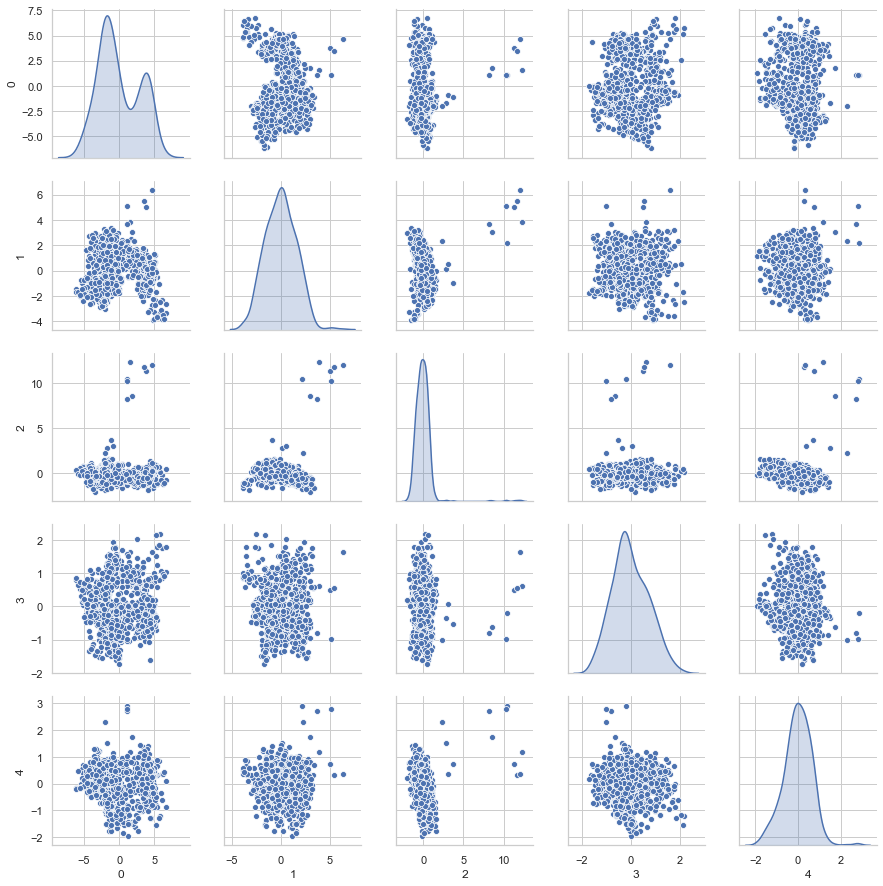

In [247]:
sns.pairplot(pd.DataFrame(X_pca_transformed), diag_kind='kde')

# SVM with PCA

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.2, random_state = 101)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

In [249]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [250]:
print("The accuracy score for the component is %.2f%%"%(model.score(X_test, y_test) * 100))

The accuracy score for the component is 92.35%


In [251]:
cross_val = cross_val_score(model,X=X_pca_transformed, y=y, cv=cv)
print("The SVM with PCA accuracy is %.2f%% with standard deviation %.2f"%(np.mean(cross_val) * 100, np.std(cross_val)))

The SVM with PCA accuracy is 93.65% with standard deviation 0.02


In [252]:
print('Confusion matrix for {}'.format(y.unique()))
print(multilabel_confusion_matrix(y_true=y_test,y_pred=y_pred, labels=y.unique()))

Confusion matrix for ['van' 'car' 'bus']
[[[123   7]
  [  3  37]]

 [[ 74   5]
  [  7  84]]

 [[130   1]
  [  3  36]]]


#### Confusion matrix breakdown
1. Van
The confusion matrix shows that the model has identified 123 predictions as van when they are actually van, and 37 as some other class when in actual it belongs to a different class. The model has wrongly identified 3 values to be van when in actual it belonged to some other class

2. Car
The confusion matrix shows that the model has identified 74 predictions as car when they are actually car, and 84 as some other class when in actual it belongs to a different class. The model has wrongly identified 7 values to be car when in actual it belonged to some other class

3. Bus
The confusion matrix shows that the model has identified 130 predictions as bus when they are actually bus, and 36 as some other class when in actual it belongs to a different class. The model has wrongly identified 3 values to be bus when in actual it belonged to some other class

In [253]:
print(cohen_kappa_score(y_test, y_pred))

0.8744175474485737


The cohen kappa score is 0.87 which shows a good aggreement between the classification

In [254]:
print(classification_report(y_test, y_pred, labels=y.unique()))

              precision    recall  f1-score   support

         van       0.84      0.93      0.88        40
         car       0.94      0.92      0.93        91
         bus       0.97      0.92      0.95        39

    accuracy                           0.92       170
   macro avg       0.92      0.92      0.92       170
weighted avg       0.93      0.92      0.92       170



#### Classification report breakdown
Precision of 84% for van indicates all the instances for which the model classified as van when in actual it was a van. Recall of 93% indicates the number of relevent van records to the total records.

Precision of 94% for car indicates all the instances for which the model classified as car when in actual it was a car. Recall of 92% indicates the number of relevent car records to the total records.

Precision of 97% for bus indicates all the instances for which the model classified as bus when in actual it was a bus. Recall of 92% indicates the number of relevent bus records to the total records.

# SVM without PCA

In [255]:
model = SVC()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 101)

In [256]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [257]:
print("The accuracy score for the SVM without PCA is %0.2f%%"%(model.score(X_test, y_test) * 100))

The accuracy score for the SVM without PCA is 92.35%


In [258]:
print("Confusion matrix for SVM without PCA for labels {}".format(y.unique()))
print(multilabel_confusion_matrix(y_pred,y_test, labels=y.unique()))

Confusion matrix for SVM without PCA for labels ['van' 'car' 'bus']
[[[121   2]
  [  9  38]]

 [[ 76   8]
  [  3  83]]

 [[130   3]
  [  1  36]]]


#### Confusion matrix breakdown
Van The confusion matrix shows that the model has identified 121 predictions as van when they are actually van, and 38 as some other class when in actual it belongs to a different class. The model has wrongly identified 9 values to be van when in actual it belonged to some other class

Car The confusion matrix shows that the model has identified 76 predictions as car when they are actually car, and 83 as some other class when in actual it belongs to a different class. The model has wrongly identified 3 values to be car when in actual it belonged to some other class

Bus The confusion matrix shows that the model has identified 130 predictions as bus when they are actually bus, and 36 as some other class when in actual it belongs to a different class. The model has wrongly identified 1 values to be bus when in actual it belonged to some other class

In [259]:
print(cohen_kappa_score(y_test, y_pred, labels=y.unique()))

0.8754999718325728


The cohen kappa score is 0.87 which shows a good aggreement between the classification

In [260]:
print(classification_report(y_test, y_pred, labels=y.unique()))

              precision    recall  f1-score   support

         van       0.81      0.95      0.87        40
         car       0.97      0.91      0.94        91
         bus       0.97      0.92      0.95        39

    accuracy                           0.92       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.93      0.92      0.92       170



#### Classification Report breakdown

Precision of 81% for van indicates all the instances for which the model classified as van when in actual it was a van. Recall of 95% indicates the number of relevent van records to the total records.

Precision of 97% for car indicates all the instances for which the model classified as car when in actual it was a car. Recall of 91% indicates the number of relevent car records to the total records.

Precision of 97% for bus indicates all the instances for which the model classified as bus when in actual it was a bus. Recall of 92% indicates the number of relevent bus records to the total records.

# SVM with grid search

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_transformed, y, test_size=0.2, random_state = 101)
model = SVC(gamma='scale')
params = { 'kernel': ('linear', 'rbf'), 'C': [0.01,0.05,0.5,1]}
model = GridSearchCV(estimator=model, param_grid=params, cv=cv)
model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=10, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [262]:
y_pred = model.predict(X_test)

In [263]:
print("The accuracy score for the component is %.2f%%"%(model.score(X_test, y_test) * 100))

The accuracy score for the component is 91.76%


In [264]:
print('Confusion matrix for {}'.format(y.unique()))
print(multilabel_confusion_matrix(y_true=y_test,y_pred=y_pred, labels=y.unique()))

Confusion matrix for ['van' 'car' 'bus']
[[[122   8]
  [  3  37]]

 [[ 74   5]
  [  7  84]]

 [[130   1]
  [  4  35]]]


#### Confusion matrix breakdown
Van The confusion matrix shows that the model has identified 122 predictions as van when they are actually van, and 37 as some other class when in actual it belongs to a different class. The model has wrongly identified 3 values to be van when in actual it belonged to some other class

Car The confusion matrix shows that the model has identified 74 predictions as car when they are actually car, and 84 as some other class when in actual it belongs to a different class. The model has wrongly identified 7 values to be car when in actual it belonged to some other class

Bus The confusion matrix shows that the model has identified 130 predictions as bus when they are actually bus, and 35 as some other class when in actual it belongs to a different class. The model has wrongly identified 4 values to be bus when in actual it belonged to some other class

In [265]:
print(cohen_kappa_score(y_test, y_pred))

0.8647496732397568


The cohen kappa score is 0.86 which shows a good aggreement between the classification

In [266]:
print(classification_report(y_test, y_pred, labels=y.unique()))

              precision    recall  f1-score   support

         van       0.82      0.93      0.87        40
         car       0.94      0.92      0.93        91
         bus       0.97      0.90      0.93        39

    accuracy                           0.92       170
   macro avg       0.91      0.92      0.91       170
weighted avg       0.92      0.92      0.92       170



#### Classification Report breakdown
Precision of 82% for van indicates all the instances for which the model classified as van when in actual it was a van. Recall of 95% indicates the number of relevent van records to the total records.

Precision of 94% for car indicates all the instances for which the model classified as car when in actual it was a car. Recall of 92% indicates the number of relevent car records to the total records.

Precision of 97% for bus indicates all the instances for which the model classified as bus when in actual it was a bus. Recall of 90% indicates the number of relevent bus records to the total records.